<a href="https://colab.research.google.com/github/rachel1234561/labs/blob/main/Copy_of_assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment #5: Probability and Bootstrapping
## Foundations of Machine Learning
## ` ! git clone https://www.github.com/DS3001/the_bootstrap`
## Do two.

In [1]:
! git clone https://www.github.com/DS3001/the_bootstrap

Cloning into 'the_bootstrap'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 29 (delta 2), reused 3 (delta 1), pack-reused 21 (from 1)
Receiving objects: 100% (29/29), 1.95 MiB | 15.45 MiB/s, done.
Resolving deltas: 100% (3/3), done.


## Q2.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
df = pd.read_csv('/content/the_bootstrap/data/mammogram.csv')

1. Cross tabulate treatment and breast_cancer_death. What is the difference in 25-year survival rates between the control and mammogram groups?

In [3]:
print( pd.crosstab( df['treatment'], df['breast_cancer_death']) , '\n')
print( pd.crosstab( df['treatment'], df['breast_cancer_death'], margins=True, normalize=True) , '\n')
#the survival rate of those in the mammogram group is very very sligtly higer than those in the control group
#but the survival rates are basically the same

breast_cancer_death     no  yes
treatment                      
control              44405  505
mammogram            44425  500 

breast_cancer_death        no       yes       All
treatment                                        
control              0.494295  0.005621  0.499917
mammogram            0.494518  0.005566  0.500083
All                  0.988813  0.011187  1.000000 



2. Bootstrap the densities and distributions of survival rates for the two groups.

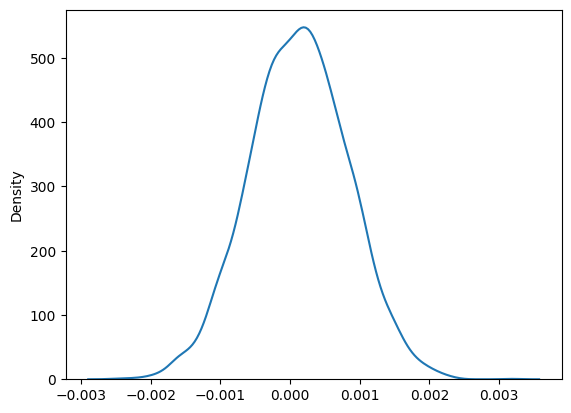

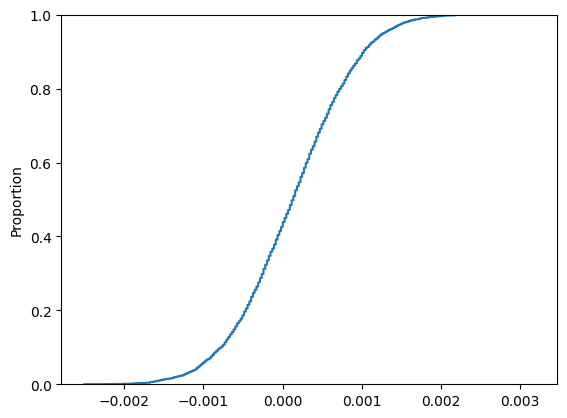

In [5]:
df['survive'] = 0
df.loc[ df['breast_cancer_death'] == 'no', 'survive'] = 1

df_treat = df.loc[ df['treatment'] == 'mammogram', :]
df_control = df.loc[ df['treatment'] == 'control', :]

S = 5000
fx = []
for t in range(S):
    df_treat_t = df_treat.sample( df_treat.shape[0], axis=0, replace=True)
    df_control_t = df_control.sample( df_control.shape[0], axis=0, replace=True)
    #
    treatment_effect_t = np.mean(df_treat_t['survive']) - np.mean(df_control_t['survive'])
    fx.append(treatment_effect_t)

sns.kdeplot(fx)
plt.show()

sns.ecdfplot(fx)
plt.show()

3. Construct a 99% confidence interval for the difference in outcomes bewteen the two groups. Does it include zero?

In [6]:
level = .99
lower_bound = np.quantile(fx, .005 )
upper_bound = np.quantile(fx, .995)

print('99% confidence interval: (', lower_bound, ', ', upper_bound, ')' )
#yes the confidence interval does include 0

99% confidence interval: ( -0.001666066690977967 ,  0.0019405386547533842 )


4. We're not doctors, these were just some intriguing data, and the information about the patients is extremely sparse. Why might these data over/understate the conclusions you've reached? What other data would you like to have to better understand or criticize your results?

The data might not entierly represent reality. For instance, those who are showing other signs of brest cancer may be more likley to get a mamogram which may skew the data. I would need other data on the factors which lead to the mamogram occuring to better understand the results from my analysis of the data.

## Q4

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
df = pd.read_csv('/content/the_bootstrap/data/heart_hw.csv')
df.head()

,Unnamed: 0,age,transplant,y
0,1,53,control,0
1,2,43,control,0
2,3,52,control,0
3,4,52,control,0
4,5,54,control,0


1. Compute (a) the proportion of people who survive in the control group who do not receive a transplant, and (b) the difference between the proportion of people who survive in the treatment group and the proportion of people who survive in the control group (the average treatment effect).

In [22]:
df['treat'] = 0
df['intercept'] = 1
df.loc[ df['transplant']=='treatment','treat']=1

print( pd.crosstab( df['transplant'], df['y']), '\n')

y            0   1
transplant        
control     30   4
treatment   45  24 



In [23]:
print(4/34)
print(24/(24+45)-4/(30+4))
#control group survival rate is 0.11764705882352941
#average treatment effect is 0.23017902813299232

0.11764705882352941
0.23017902813299232


2. Regress y on transplant using a linear model. How does the constant/intercept of the regression and the coefficient on transplant compare to your answers from part 1? Explain carefully.

In [24]:
from sklearn.linear_model import LinearRegression
y = df['y']
X = df.loc[:,['intercept', 'treat']]

reg = LinearRegression(fit_intercept=False).fit(X,y)

print('Regression Coefficients: ', reg.coef_)
#the constant of the regression is the same as the control group survival rate
#the intercept of the regression is the same as the average treatment effect

Regression Coefficients:  [0.11764706 0.23017903]


3. We'd like to include age in the regression, since it's reasonable to expect that older patients are less likely to survive an extensive surgery like a heart transplant. Regress y on transplant, age, and transplant  ×  age. You can do this using a linear regression. How do the intercept and the coefficient on transplanttreatment change?

In [25]:
from sklearn.linear_model import LinearRegression

y = df['y']
X = df.loc[:,['intercept', 'treat', 'age'] ]

reg = LinearRegression(fit_intercept=False).fit(X,y)

print('Regression Coefficients: ', reg.coef_)
#the coefficent for average treatnt effect as well as the proportion of the control group who survived increased

Regression Coefficients:  [ 0.70195697  0.26470169 -0.01360722]


4. Build a more flexible model that allows for non-linear age effects and interactions between age and treatment. Estimate the model, and plot the predicted survival probability by age, hued for people who receive a heart transplant and those who don't. Describe what you see.

Regression Coefficients:  [-8.54714047e-01  5.86191756e-01  1.02563021e-01 -7.70114914e-03
 -2.70227509e-03  2.01932637e-05]


<Axes: xlabel='age'>

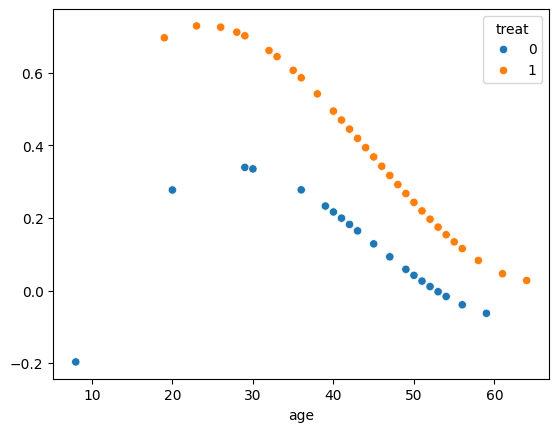

In [26]:
from sklearn.linear_model import LinearRegression
df['treatXage'] = df['treat']*df['age']
df['age_sq'] = df['age']**2
df['treatXage_sq'] = df['treat']*df['age_sq']
df['age_cu'] = df['age']**3
df['treatXage_cu'] = df['treat']*df['age_cu']

y = df['y']
X = df.loc[:,['intercept', 'treat', 'age',
              'treatXage',
              'age_sq', 'age_cu'] ]
reg = LinearRegression(fit_intercept=False).fit(X,y)
print('Regression Coefficients: ', reg.coef_)
y_hat = reg.predict(X)
sns.scatterplot(x=df['age'], y = y_hat, hue = df['treat'])
#the probability for survival for both groups seems highest in peoples 20s, and overall group 2, or the treatment group has
#a higher survival rate across ages

5. Imagine someone suggests using these kinds of models to select who receives organ transplants; perhaps the CDC or NIH starts using a scoring algorithm to decide who is contacted about a potential organ transplant. What are your concerns about how it is built and how it is deployed?

My concerns would be around fairness and bias, as the algorithm would likley discriminate based on age, and possibly other factors such as race and gender if they are included in the data set. In addition, it would be difficult to trace the decision back to a person so accountability for bias would be reduced.